

#**A supervised classification model for term deposit prediction**


###**Abstract**:

####The bank pertaining to the dataset is facing a revenue decline. Knowing that term deposits allow the bank to hold on to a deposit for a fixed time and improve financial gains, they decided to create a machine learning model which predicts the capability of their existing clients to subscribe to a term deposit.

###**Problem Statement**:

####The dataset in our procession is related with the direct marketing campaigns of this banking institution. The classification goal is to predict if the client will subscribe to a term deposit. 



### **Bank client data**:

####Lets take a look at the various feature columns:
 
1. Age (numeric)
2. Job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3 month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

###**Output variable:**
21. y: has the client subscribed a term deposit? (binary: ‘yes’,’no’)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

###**1. Data Collection**

In [2]:
#drive.mount('/content/gdrive')
#df = pd.read_csv("/content/gdrive/My Drive/project/bank-additional-full.csv", sep=';')
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


print('There are', df.shape[0], 'observations and',df.shape[1], 'Features including target "y" in the dataset')

df.info()

df.describe()

### **2. Exploratory Data analysis**

sns.set_theme(style="whitegrid")

#Countplot of target column

plt.figure(figsize = (8, 6))
target=sns.countplot(x ='y', data = df)
total = float(len(df))
plt.title('Target count', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

This is an imbalanced dataset since 88.7% of target is 'NO' and only 11.3% of target is 'YES'

#### **2.1 Univariate Data Analysis**

#Plotting count of Job Distribution

job_count = df['job'].value_counts()
plt.figure(figsize = (8, 6))
job_count.plot(kind = "bar")
plt.title("Job Distribution",fontsize=20)
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

plt.figure(figsize = (15, 6))
target=sns.countplot(x ='job', data = df, hue='y')
total = float(len(df))
plt.title('Job Distribution based on term deposit', fontsize=20)
plt.xticks(rotation = 45,fontsize = 10)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

In the dataset the majority are from Admin, blue collar and technician jobs & most of the term deposit subscibers are also from these categories.

#Plotting count of Marital Distribution

mar_count = df['marital'].value_counts()
plt.figure(figsize = (8, 8))
mar_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Marital Distribution",fontsize=20)
plt.show()

plt.figure(figsize = (8, 6))
target=sns.countplot(x ='marital', data = df, hue='y')
total = float(len(df))
plt.title('Marital Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

As most of the clients are married, both term deposit acceptance and rejection rate is significant among them.

#Plotting count of Credit in default Distribution

cred_count = df['default'].value_counts()
plt.figure(figsize = (8, 6))
cred_count.plot(kind = "barh")
plt.title("Credit in default Distribution",fontsize=20)
plt.ylabel("Credit in default")
plt.xlabel("Count")
plt.show()

plt.figure(figsize = (8, 6))
target=sns.countplot(x ='default', data = df, hue='y')
total = float(len(df))
plt.title('Credit in default Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Compared to other features presence of unknown value is more in this particular feature.

#Plotting count of Housing loan Distribution

hou_count = df['housing'].value_counts()
plt.figure(figsize = (8, 6))
hou_count.plot(kind = "area")
plt.title("Housing loan Distribution",fontsize=20)
plt.xlabel("Housing loan")
plt.ylabel("Count")
plt.show()

plt.figure(figsize = (8, 6))
target=sns.countplot(x ='housing', data = df, hue='y')
total = float(len(df))
plt.title('Housing loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

6.1% clients subscribed tern depoit eventhough they had housing loan.

#Plotting count of Job Distribution of Clients with personal loan

plt.figure(figsize = (15, 6))
job_count_yes = df[df['loan']=='yes']
job_count_y=job_count_yes['job'].value_counts()
job_count_y.plot(kind = "line")
plt.title("Job Distribution having Personal Loan",fontsize=20)
plt.xlabel("Job Distribution having Personal loan")
plt.ylabel("Count")
plt.show()

#Plotting count of Personal loan Distribution

plt.figure(figsize = (8, 6))
target=sns.countplot(x ='loan', data = df, hue='y')
total = float(len(df))
plt.title('Personal loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the people are free from personal loan and at the same time 9.3% subscribed the term deposit from that category.

#Pie-chart of Educational distribution of clients

plt.figure(figsize = (8, 8))
education_count = df['education'].value_counts()
plt.pie(education_count, labels=["university.degree=12168","high.school=9515","basic.9y=6045",
"professional.course=5243","basic.4y=4176","basic.6y=2292","unknown=1731","illiterate=18"],autopct='%.0f%%',shadow=True)
plt.title('Pie-chart of Educational distribution of clients',size=20)
plt.show()

plt.figure(figsize = (15, 6))
target=sns.countplot(x ='education', data = df, hue='y')
total = float(len(df))
plt.title('Education Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the clients have high school or above education. They constitutes the major part in term deposit subscription. 


#Plotting count of Communication type Distribution

comm_count = df['contact'].value_counts()
plt.figure(figsize = (8, 6))
comm_count.plot(kind = "barh")
plt.title("Communication type Distribution",fontsize=20)
plt.ylabel("Communication type")
plt.xlabel("Count")
plt.show()

#Plotting count of Last contact month Distribution

mon_count = df['month'].value_counts()
plt.figure(figsize = (8, 6))
mon_count.plot(kind = "bar")
plt.title("Last contact month Distribution",fontsize=20)
plt.xlabel("Last contact month")
plt.ylabel("Count")
plt.show()

plt.figure(figsize = (15, 6))
target=sns.countplot(x ='month', data = df, hue='y')
total = float(len(df))
plt.title('Last contact month Distribution based on term deposit subscription', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Eventhough the campaigning was meagre during the months october, december, march and september, we can see that the campaigning was effective as the rate of term deposit subscription  is almost equal to the non subscription. In other months the difference between subscription and non subscription is very high.

#Plotting count of the Last contact day of week Distribution

day_count = df['day_of_week'].value_counts()
plt.figure(figsize = (8, 8))
day_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Last contact day of week Distribution",fontsize=20)
plt.show()

plt.figure(figsize = (10, 6))
target=sns.countplot(x ='day_of_week', data = df, hue='y')
total = float(len(df))
plt.title('Last contact day of week Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The categorical feature last day of contact has no role in term deposit subscription.

#Plotting count of the Outcome of the previous marketing campaign Distribution

pout_count = df['poutcome'].value_counts()
plt.figure(figsize = (8, 6))
pout_count.plot(kind = "area")
plt.title("Outcome of the previous marketing campaign Distribution",fontsize=20)
plt.xlabel("Outcome of the previous marketing campaign")
plt.ylabel("Count")
plt.show()

plt.figure(figsize = (10, 6))
target=sns.countplot(x ='poutcome', data = df, hue='y')
total = float(len(df))
plt.title('Outcome of the previous marketing campaign Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The chance of attaining subscription to a new term deposit is higher for  clients who have subscribed term deposit in previous campaigns. Nearly 10% of clients who did not attend the previous campaign has subscribed the term deposit.

### **2.2 Bivariate Data Analysis**

#Plotting 'Duration' vs 'campaign'

plt.figure(figsize = (12, 8))
plt.title('Call duration vs Campaign',size=15)
sns.scatterplot(data=df, x='duration', y ='campaign', hue='y')
plt.show()

There is an increase in tendency to take term deposit with the increase in call duration. As the number of contacts performed increases the chance of subscription decreases.

#Plotting 'Job' vs 'age'

plt.figure(figsize = (17, 8))
sns.boxplot(data=df, x='job', y='age',hue='y')
plt.title('Job vs Age',size=15)
plt.show()

Median age of the clients are in between 30 and 50.

#Plotting 'previous' vs 'duration'

plt.figure(figsize = (15, 6))
plt.title('Previous contacts vs Call duration',size=15)
sns.stripplot(x='previous',y= "duration",hue='y', data=df)
plt.show()

Term deposit subscription depends on call duration rather than number of contacts perfomed before this campaign. 

#Plotting 'age' vs 'duration'

plt.figure(figsize=(10,10))
plt.title('Age vs Call duration',size=15)
sns.scatterplot(x ='age',y= 'duration',hue='y', data=df)
plt.show()

Age has no specific dependance on term deposit subscription. It depends mainly on call duration. 

## **3**. **Preprocessing** 

### **3.1 Missing Value Handling**

df.isna().sum()

isna() function gives no Missing values but there are missing vlaues as 'unknown'

Since it's an imbalanced dataset, We have already decided to oversample our data set. So, removing 'unknown' values having target y= 'NO' and keeping the rest 'unknown' values as separate category for acquiring better results.


In [49]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [50]:
df=df[(df['default']!='unknown')&(df['job']!='unknown')&(df['marital']!='unknown')&(df['education']!='unknown')&(df['loan']!='unknown')&(df['housing']!='unknown')|(df['y']=='yes')]
df.shape

(31269, 21)

In [51]:
df.y.value_counts()

no     26629
yes     4640
Name: y, dtype: int64

**Removing Biased Features**

In [52]:
df['pdays'].value_counts()

999    29831
3        420
6        397
4        112
9         61
2         59
7         56
12        54
10        45
5         45
13        35
11        27
15        22
1         22
14        18
8         17
0         14
16         9
18         7
17         7
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [53]:
df['previous'].value_counts()

0    26405
1     3887
2      686
3      203
4       64
5       18
6        5
7        1
Name: previous, dtype: int64

'pdays' and 'previous' have dominating value as 999 and 0 respectively. Thus removing 'pdays' and 'previous'.

Duration: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

We are creating a predictive model. So, removing 'duration' feature

In [54]:
df1=df.drop(['duration','pdays','previous'],axis=1)

### **3.2 Oversampling Data**

from sklearn.utils import resample


df_majority = df[df.y=='no']
df_minority = df[df.y=='yes']

df_minority_upsampled = resample(df_minority,
                        replace=True,    
                        n_samples=12000,    
                        random_state=42) 
 
df1 = pd.concat([df_minority_upsampled, df_majority])
df1.y.value_counts()

In [55]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


We randomly inserted duplicate rows in the minority class (data having target value 'YES') and upsampled it into around 30% target 'YES' values. 

### **3.3 Outlier Detection**

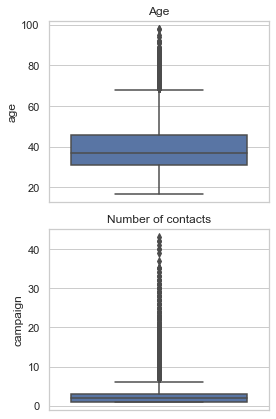

In [56]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df1['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df1['campaign'])
plt.tight_layout() 
plt.show()

'Campaign' and 'age' show outliers 

In [57]:
for i in ["age", "campaign"]:
        for j in df1["y"].unique():
            target_type = df1[df1["y"] == j]
            column = target_type[i]
            q1 = column.quantile(0.25) 
            q3 = column.quantile(0.75) 
            iqr = q3 - q1 
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr        
            outliers = column[(column > upper_limit) | (column < lower_limit)].index 
            df1.drop(index= outliers, inplace=True)

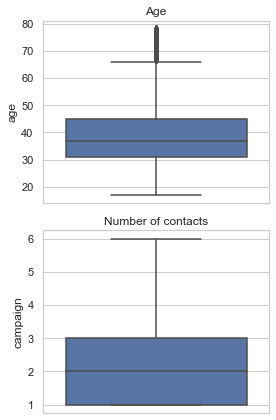

In [58]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df1['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df1['campaign'])
plt.tight_layout() 
plt.show()

Outliers are removed

In [59]:
df1.y.value_counts()

no     24766
yes     4005
Name: y, dtype: int64

### **3.4 Feature Engineering**

In [60]:
df1["any_loan"]=(df1["housing"]=='yes')| (df1["loan"]=='yes')

In [61]:
df1["any_loan"].value_counts()

True     17358
False    11413
Name: any_loan, dtype: int64

### **3.5 Label Encoding**

In [62]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype ==  bool or df1[i].dtype == object and i!='y':
        df1[i]=label_en.fit_transform(df1[i])
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,any_loan
0,56,3,1,0,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,7,1,3,0,2,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,0,1,1,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,7,1,3,0,0,2,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
6,59,0,1,5,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0


### **3.6 Normalisation**

We need to split dataset before normalisation


In [63]:
y = df1['y']
x = df1.drop('y', axis = 1)

In [64]:
from sklearn.preprocessing import normalize
X = normalize(x)
X = pd.DataFrame(X, columns = x.columns)
X.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,any_loan
count,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000,28771.000000
mean,0.007499,0.000721,0.000233,0.000749,0.000002,0.000210,0.000061,0.000063,0.000831,0.000392,0.000385,0.000179,-0.000022,0.018123,-0.007874,0.000662,0.999772,0.000117
std,0.001892,0.000704,0.000121,0.000386,0.000022,0.000193,0.000141,0.000090,0.000468,0.000271,0.000238,0.000077,0.000314,0.000236,0.000953,0.000338,0.000018,0.000095
min,0.003348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000191,0.000000,-0.000677,0.017869,-0.010232,0.000127,0.999655,0.000000
25%,0.006078,0.000000,0.000191,0.000392,0.000000,0.000000,0.000000,0.000000,0.000574,0.000191,0.000193,0.000191,-0.000353,0.017960,-0.008166,0.000257,0.999763,0.000000
50%,0.007076,0.000385,0.000196,0.000598,0.000000,0.000382,0.000000,0.000000,0.000801,0.000385,0.000382,0.000192,0.000212,0.018103,-0.008036,0.000931,0.999775,0.000191
75%,0.008797,0.001372,0.000382,0.001147,0.000000,0.000385,0.000000,0.000191,0.001176,0.000588,0.000574,0.000196,0.000268,0.018213,-0.007011,0.000949,0.999786,0.000193
max,0.015621,0.002215,0.000599,0.001410,0.000385,0.000403,0.000403,0.000201,0.001813,0.000806,0.001208,0.000403,0.000268,0.019088,-0.005360,0.000971,0.999809,0.000201


### **3.7 Feature Reduction**

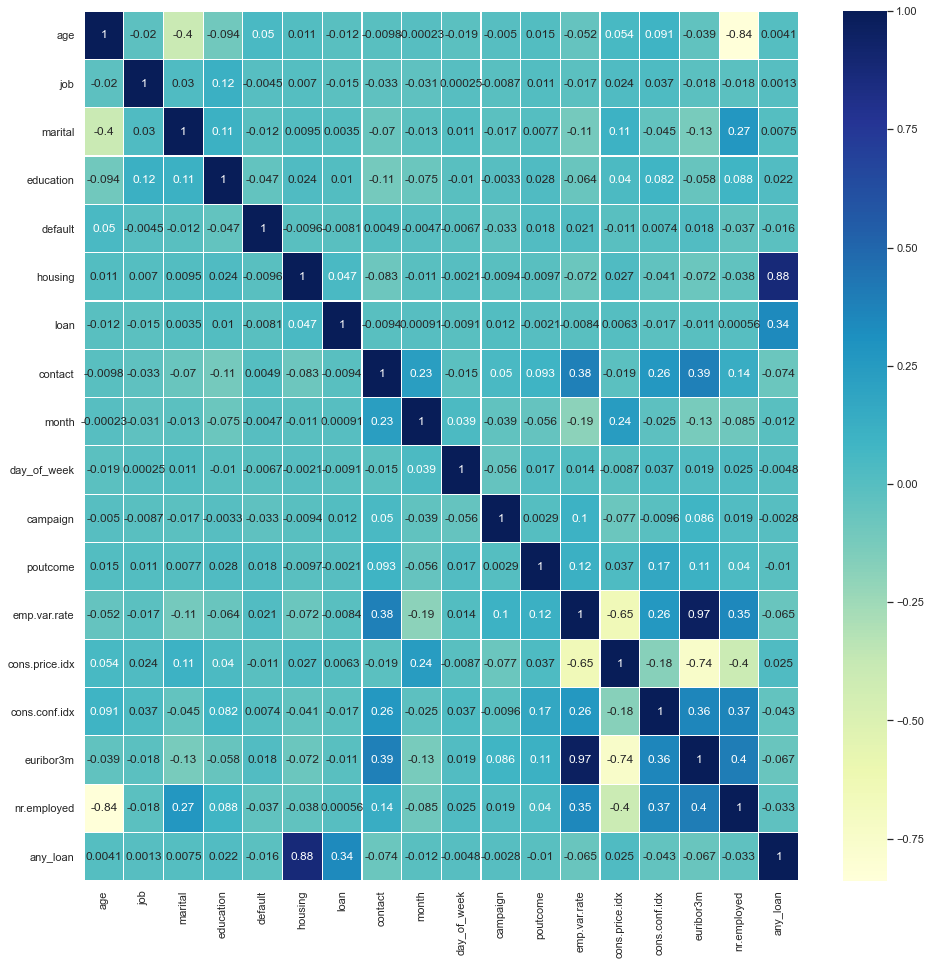

In [65]:
corr=X.corr()
plt.figure(figsize=(16,16))
ax = sns.heatmap(corr, annot=True, linewidths=0.1, linecolor='white',cmap="YlGnBu")

Removing features having  .8 and higher or -.8 and lesser correlation 

In [66]:
columns = np.full((corr.shape[0]), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8 or corr.iloc[i,j] <= -0.8:
            if columns[i]:
                columns[i] = False
selected_columns = X.columns[columns]
X = X[selected_columns]

In [67]:
X.columns

Index(['job', 'marital', 'education', 'default', 'loan', 'contact', 'month',
       'day_of_week', 'campaign', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'any_loan'],
      dtype='object')

Features 'age', 'housing', 'emp.var.rate' are removed

## Modeling

In [68]:
#importing train_test_split library from model_selection
from sklearn.model_selection import train_test_split
#creating the instances
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [69]:
X_train.shape

(23016, 15)

In [70]:
y_test.shape

(5755,)

In [71]:
#importing logistic regression from linear model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_predict = logit_model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [73]:
print("Accuracy is :", accuracy_score(y_test,y_predict))
print("Precision is :", precision_score(y_test,y_predict, average='macro'))
print("Recall is :", recall_score(y_test,y_predict, average='macro'))
print("F1 score is :", f1_score(y_test,y_predict, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_predict))

Accuracy is : 0.8648132059079062
Precision is : 0.4324066029539531
Recall is : 0.5
F1 score is : 0.4637532612746926



Confusion matrix

 [[4977    0]
 [ 778    0]]


E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#creating empty list for finding optimal K values(Accuracy values)
acc_value = []
#creating neighbors as 3 to 15
neighbors = np.arange(3,15)
for k in neighbors:
    # taking instances for KNN into variable name classifier using the method minkowski
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_value.append(acc)

In [ ]:
acc_value

In [ ]:
plt.plot(neighbors,acc_value,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy values")

In [75]:
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [76]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8754126846220678
Precision is : 0.7326481694684439
Recall is : 0.665538340117755
F1 score is : 0.6901575180072874



Confusion matrix

 [[4744  233]
 [ 484  294]]


### SVM- Support Vector Machine

In [77]:
#importing SVC from SVM
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)

In [78]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8648132059079062
Precision is : 0.4324066029539531
Recall is : 0.5
F1 score is : 0.4637532612746926



Confusion matrix

 [[4977    0]
 [ 778    0]]


E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [79]:
#importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(X_train,y_train)
y_pred=dec_tree_model.predict(X_test)

In [80]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8472632493483927
Precision is : 0.6812332661525019
Recall is : 0.7002313469724227
F1 score is : 0.6898444361673265



Confusion matrix

 [[4488  489]
 [ 390  388]]


### Random Forest Model

In [81]:
#importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rand_f=RandomForestClassifier()
rand_f.fit(X_train,y_train)
y_pred=rand_f.predict(X_test)

In [82]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9004344048653344
Precision is : 0.8111994342291372
Recall is : 0.7130797813902823
F1 score is : 0.7486811651428398



Confusion matrix

 [[4827  150]
 [ 423  355]]


In [83]:
pd.Series(rand_f.feature_importances_,index=X.columns).sort_values(ascending=False)*100

nr.employed       15.785834
euribor3m         12.652350
cons.price.idx     9.601700
education          8.980272
poutcome           8.976628
default            8.360561
job                6.486866
campaign           5.951968
day_of_week        5.113191
any_loan           4.063794
marital            3.977759
cons.conf.idx      3.219031
month              2.724943
loan               2.207531
contact            1.897572
dtype: float64

In [84]:
rf_tune = RandomForestClassifier(n_estimators=700, max_depth=19,random_state=25,criterion="entropy")

In [85]:
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=700,
                       random_state=25)

In [86]:
y_pred=rf_tune.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))

Accuracy is : 0.9049522154648132
Precision is : 0.831332735247209
Recall is : 0.7146073738683807
F1 score is : 0.7550591459506641


### Gradient Boosting

In [87]:
#importing GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
grad_b=GradientBoostingClassifier()
grad_b.fit(X_train, y_train)
y_pred=grad_b.predict(X_test)

In [88]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9066898349261512
Precision is : 0.8506120324407342
Recall is : 0.7042255558086479
F1 score is : 0.7503910998602791



Confusion matrix

 [[4886   91]
 [ 446  332]]


### Extreme Gradient Boosting

In [89]:
#importing XGBClassifier from xgboost
from xgboost import XGBClassifier

In [90]:
xg_boost=XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred=xg_boost.predict(X_test)

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9047784535186794
Precision is : 0.8231346380714168
Recall is : 0.7248089282679762
F1 score is : 0.7611102728324386



Confusion matrix

 [[4835  142]
 [ 406  372]]
